In [2]:
## insatll Dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

In [13]:
## Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

## Modelling

In [18]:
## Building dataset
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train= generate_3d_data(60)
X_train= X_train - X_train.mean(axis=0, keepdims=0)

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [24]:
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3636
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0963
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0411
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0321
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0435
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0354
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

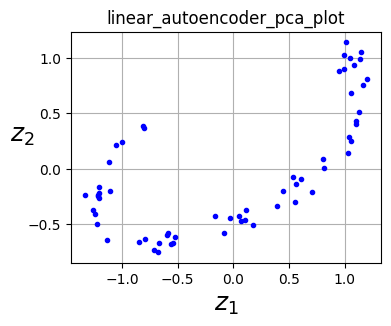

In [25]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.title("linear_autoencoder_pca_plot")
plt.show()